In [10]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [16]:
# Load the dataset
df = pd.read_csv("heart_disease_dataset.csv")

# Preview the dataset
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [17]:
# Check shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (400, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null   

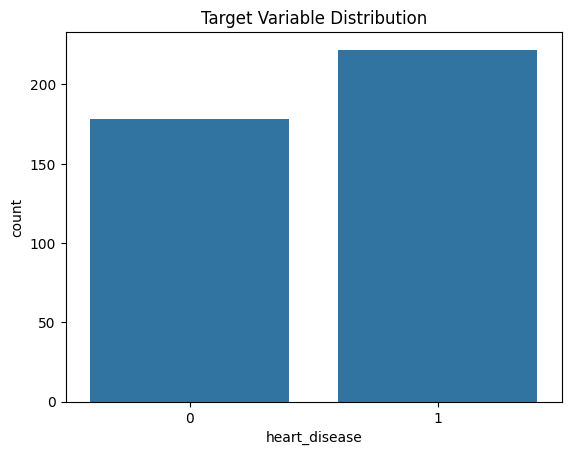

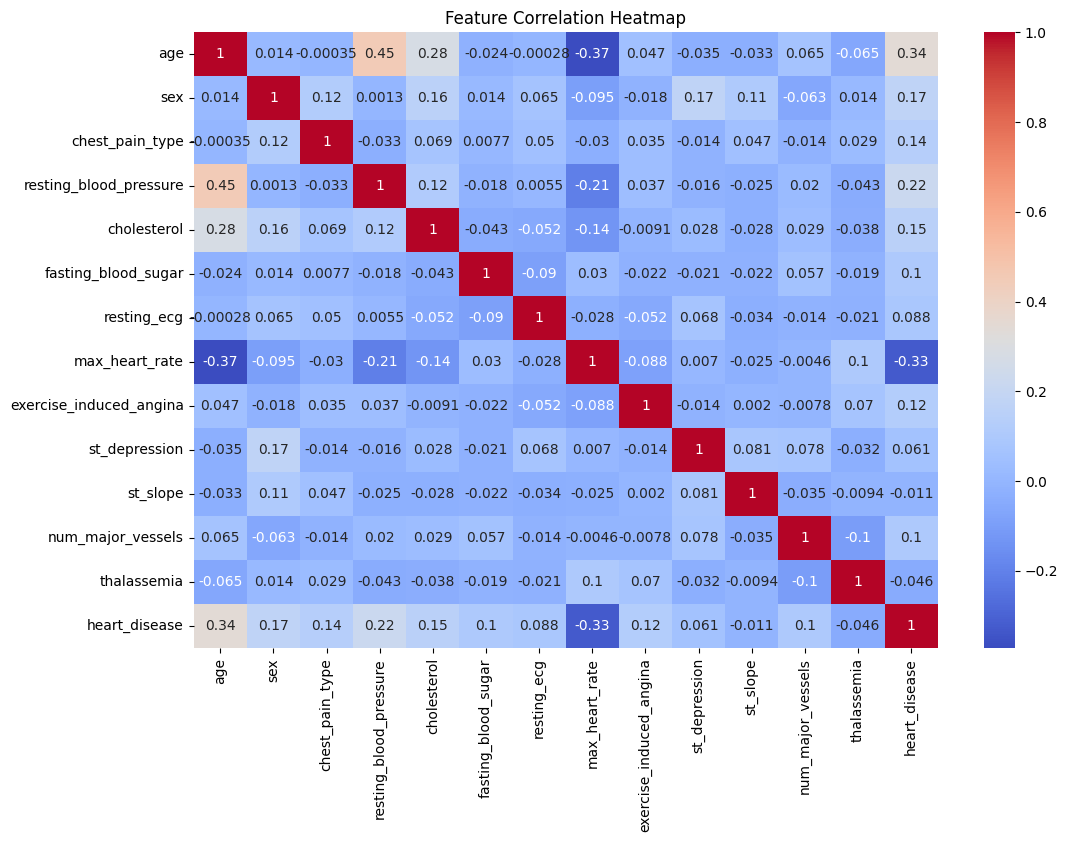

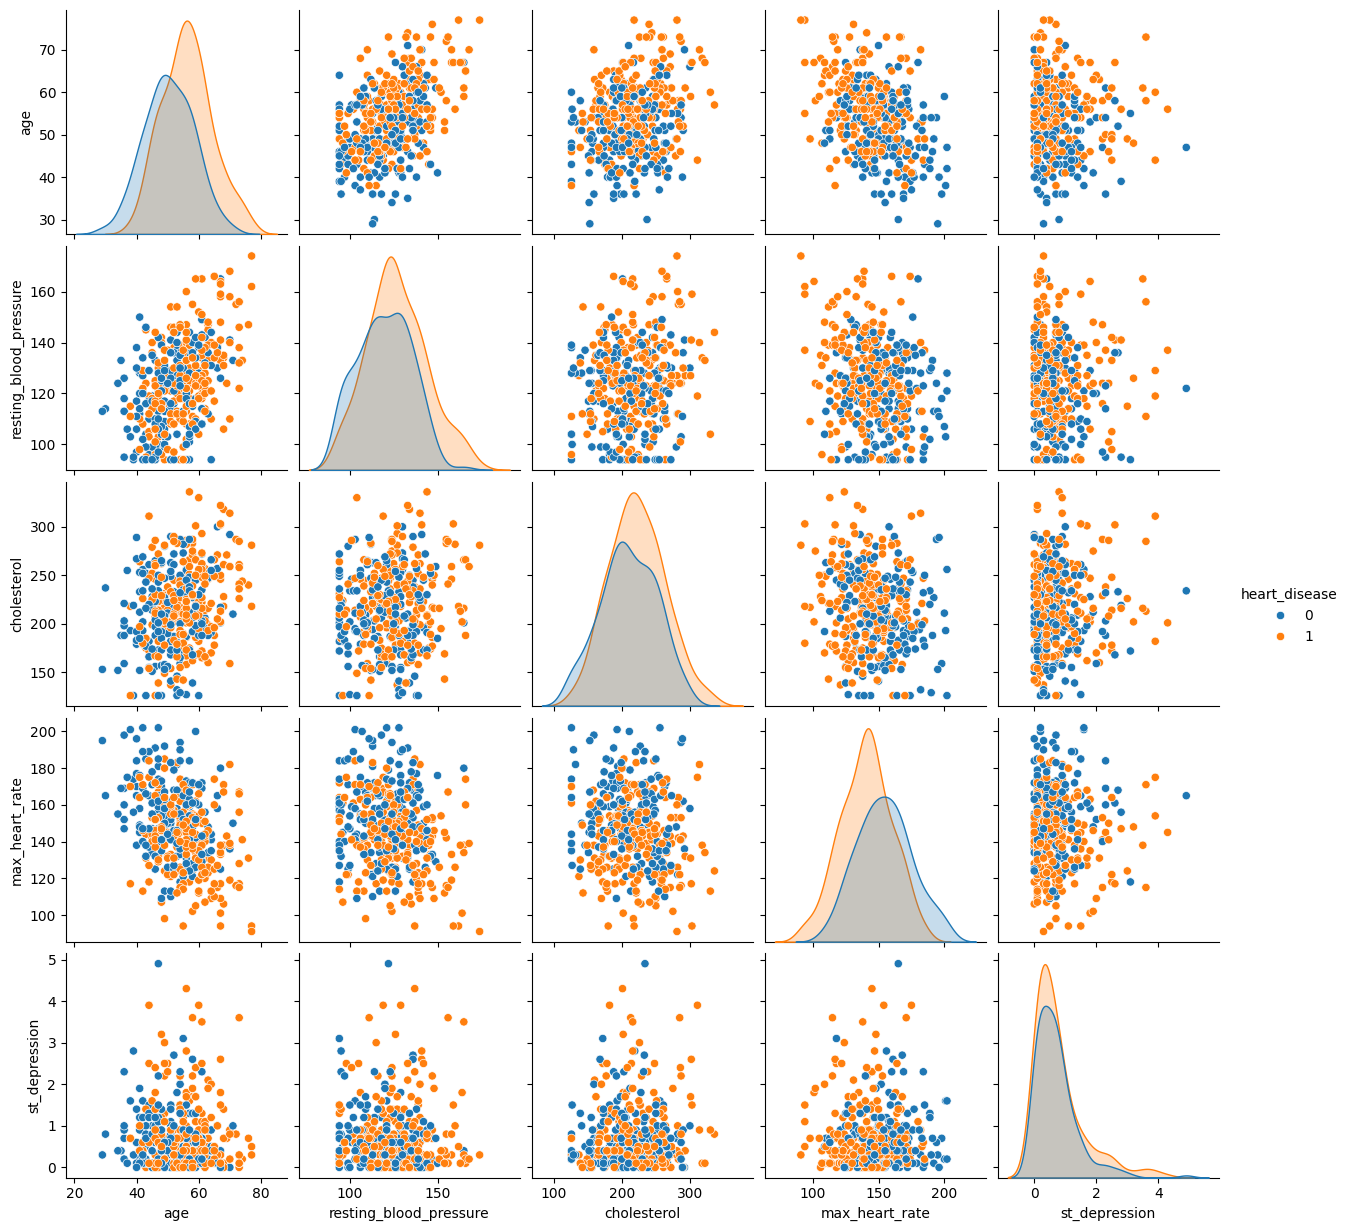

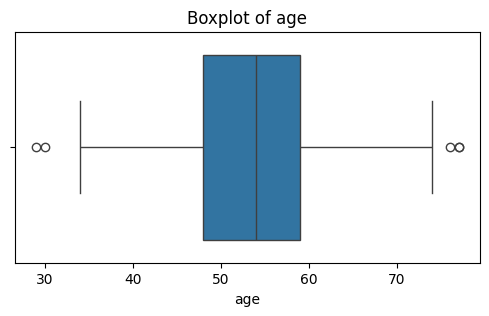

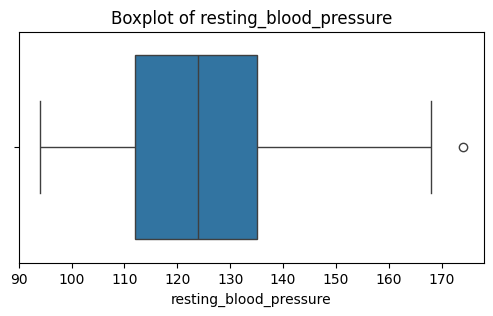

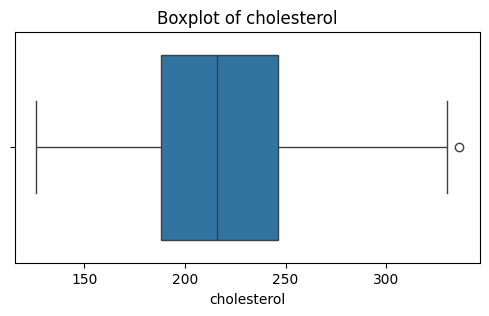

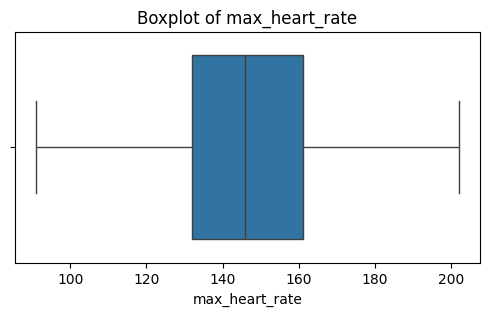

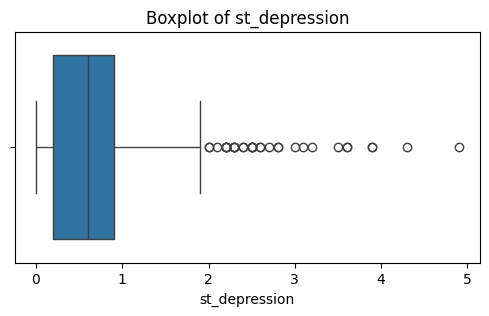

In [18]:
# Distribution of target variable
sns.countplot(x='heart_disease', data=df)
plt.title("Target Variable Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for continuous variables
continuous_features = ['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']
sns.pairplot(df[continuous_features + ['heart_disease']], hue='heart_disease')
plt.show()

# Boxplot to check outliers
for col in continuous_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [19]:
# If there were missing values, handle them (mean/median/mode)
df.fillna(df.median(), inplace=True)  # Replace with median as example


In [20]:
# Columns that are categorical: 'sex','chest_pain_type','fasting_blood_sugar','resting_ecg','exercise_induced_angina','st_slope','thalassemia'
categorical_cols = ['sex','chest_pain_type','fasting_blood_sugar','resting_ecg','exercise_induced_angina','st_slope','thalassemia']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [21]:
# Scale numerical features for algorithms like SVM, Logistic Regression
scaler = StandardScaler()
numerical_cols = ['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [22]:
# Separate features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (320, 13)
Testing set shape: (80, 13)


In [23]:
# Required Libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)  # probability=True needed for ROC curve


In [24]:
# Dictionary to store models
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model
}

# Train each model and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]  # for ROC-AUC
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }



Decision Tree Performance Metrics:
Accuracy: 0.588
Precision: 0.612
Recall: 0.682
F1-Score: 0.645
ROC-AUC: 0.577


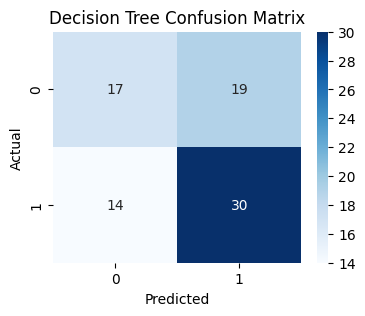


Random Forest Performance Metrics:
Accuracy: 0.662
Precision: 0.673
Recall: 0.750
F1-Score: 0.710
ROC-AUC: 0.764


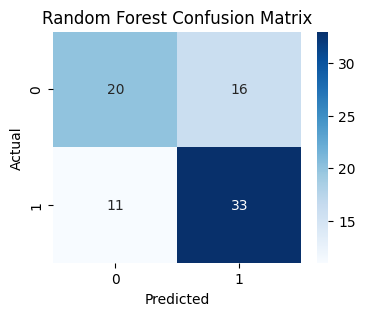


Logistic Regression Performance Metrics:
Accuracy: 0.662
Precision: 0.681
Recall: 0.727
F1-Score: 0.703
ROC-AUC: 0.736


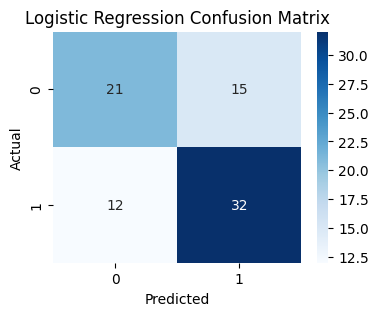


SVM Performance Metrics:
Accuracy: 0.637
Precision: 0.653
Recall: 0.727
F1-Score: 0.688
ROC-AUC: 0.739


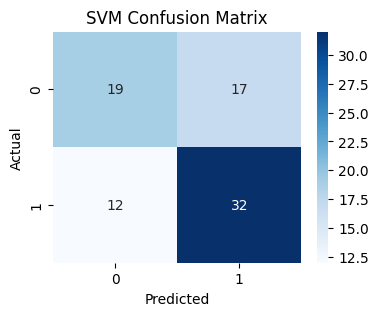

In [25]:
for name, metrics in results.items():
    print(f"\n{name} Performance Metrics:")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"Recall: {metrics['Recall']:.3f}")
    print(f"F1-Score: {metrics['F1-Score']:.3f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.3f}")
    
    # Confusion matrix heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


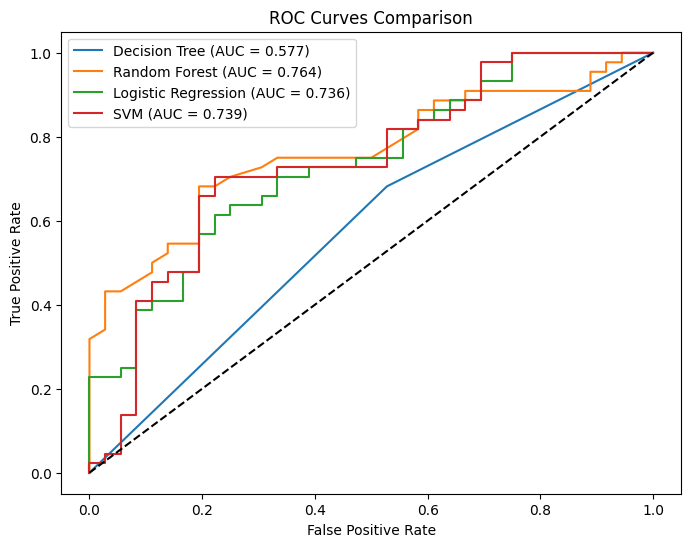

In [27]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


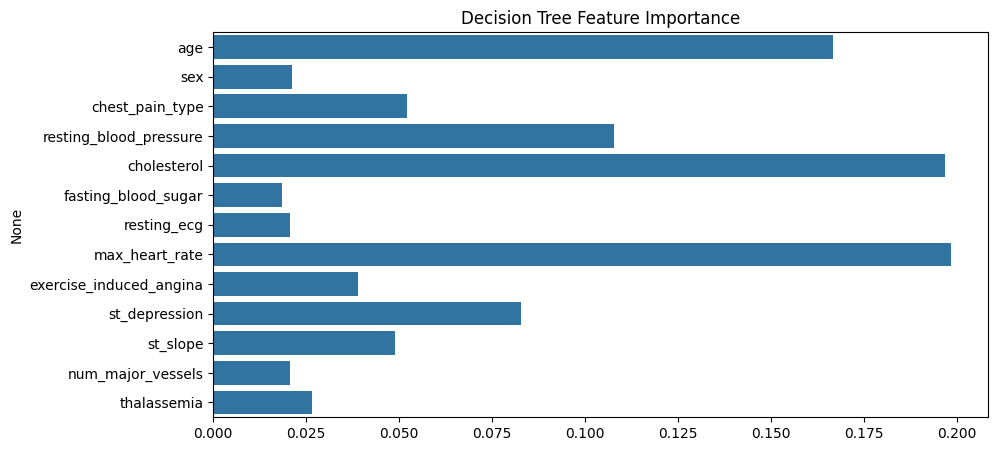

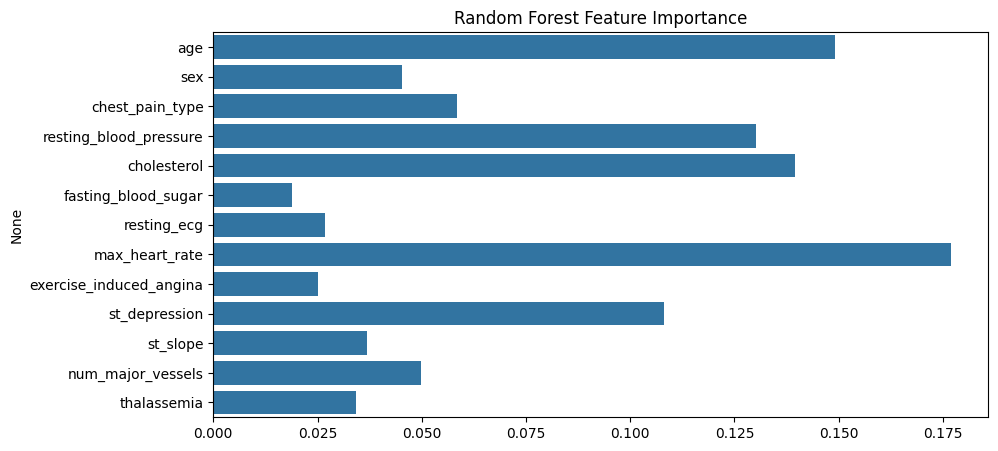

In [14]:
# Decision Tree Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=dt_model.feature_importances_, y=X_train.columns)
plt.title("Decision Tree Feature Importance")
plt.show()

# Random Forest Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=rf_model.feature_importances_, y=X_train.columns)
plt.title("Random Forest Feature Importance")
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV


In [29]:
# Decision Tree parameters
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Logistic Regression parameters
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # saga supports all penalties
    'max_iter': [1000]
}

# SVM parameters
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [30]:
# Function to perform GridSearchCV
def perform_grid_search(model, param_grid):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                        cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best Parameters:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    return grid.best_estimator_

# Optimize each model
best_dt = perform_grid_search(DecisionTreeClassifier(random_state=42), dt_param_grid)
best_rf = perform_grid_search(RandomForestClassifier(random_state=42), rf_param_grid)
best_lr = perform_grid_search(LogisticRegression(random_state=42), lr_param_grid)
best_svm = perform_grid_search(SVC(probability=True, random_state=42), svm_param_grid)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.596875
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.696875
Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.70625
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.69375



Decision Tree Optimized Performance:
Accuracy: 0.5875
Precision: 0.6122448979591837
Recall: 0.6818181818181818
F1-Score: 0.6451612903225806
ROC-AUC: 0.5997474747474748


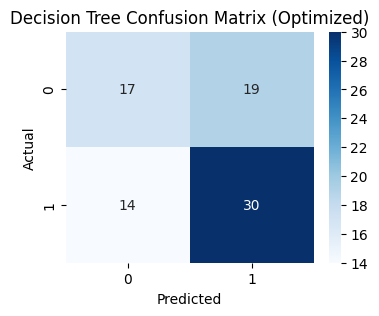


Random Forest Optimized Performance:
Accuracy: 0.7
Precision: 0.6785714285714286
Recall: 0.8636363636363636
F1-Score: 0.76
ROC-AUC: 0.735479797979798


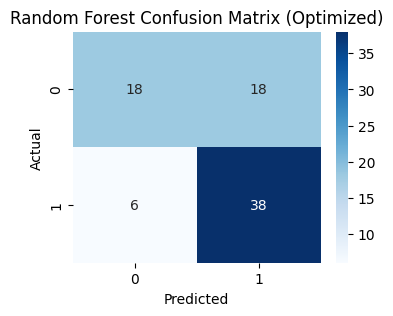


Logistic Regression Optimized Performance:
Accuracy: 0.65
Precision: 0.66
Recall: 0.75
F1-Score: 0.7021276595744681
ROC-AUC: 0.7493686868686869


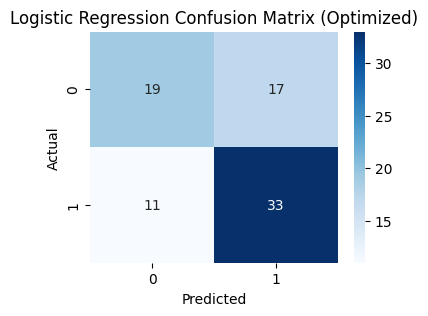


SVM Optimized Performance:
Accuracy: 0.6625
Precision: 0.6808510638297872
Recall: 0.7272727272727273
F1-Score: 0.7032967032967034
ROC-AUC: 0.7474747474747475


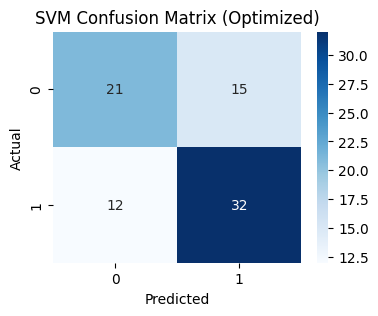

In [34]:
optimized_models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Logistic Regression": best_lr,
    "SVM": best_svm
}

for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"\n{name} Optimized Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    
    # Confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix (Optimized)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


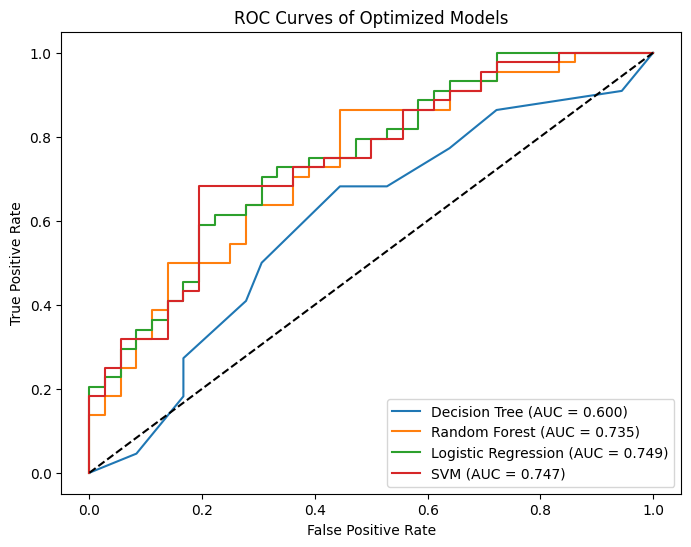

In [35]:
plt.figure(figsize=(8,6))

for name, model in optimized_models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves of Optimized Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [36]:
# Create a performance summary
performance_summary = []

for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    performance_summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

performance_df = pd.DataFrame(performance_summary)
print(performance_df.sort_values(by="ROC-AUC", ascending=False))


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2  Logistic Regression    0.6500   0.660000  0.750000  0.702128  0.749369
3                  SVM    0.6625   0.680851  0.727273  0.703297  0.747475
1        Random Forest    0.7000   0.678571  0.863636  0.760000  0.735480
0        Decision Tree    0.5875   0.612245  0.681818  0.645161  0.599747


In [37]:
import pickle

# Save the model
with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

print("Model saved successfully!")


Model saved successfully!


In [40]:
# Load the model
with open("heart_disease_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Example prediction
sample_input = X_test.iloc[0].values.reshape(1, -1)  # reshape for single sample
prediction = loaded_model.predict(sample_input)
probability = loaded_model.predict_proba(sample_input)[0][1]

print("Prediction (0=No Heart Disease, 1=Heart Disease):", prediction[0])
print("Probability of Heart Disease:", probability)


Prediction (0=No Heart Disease, 1=Heart Disease): 1
Probability of Heart Disease: 0.5809174677151803


In [1]:
import shutil

# Source paths (current location of files)
src_model = r"C:\Users\DELL\heart_disease_model.pkl"
src_preprocessor = r"C:\Users\DELL\preprocessor.pkl"

# Destination folder (project folder)
dest_folder = r"C:\Users\DELL\hearttt"

# Move the files
shutil.move(src_model, dest_folder)
shutil.move(src_preprocessor, dest_folder)

print("Files moved successfully!")


Files moved successfully!


In [1]:
import pickle

# Load the model
with open("C:\\Users\\DELL\\hearttt\\heart_disease_model.pkl", "rb") as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [2]:
import pickle

# Correct way to load the model
with open("C:\\Users\\DELL\\hearttt\\heart_disease_model.pkl", "rb") as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!
